<a href="https://colab.research.google.com/github/rbarkerclarke/MaskMimicMaintain/blob/main/Plot_FP_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emcee
#!pip install -r /content/spatial-fokker-planck/requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.6 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
%matplotlib inline

In [3]:
def fx(x,awm,amw,s,mu):
    if awm==0:
        return(s*x)
    f = (-x + mu*np.log(1-x)+mu*np.log(x)-x*amw/awm + np.log(1+x*awm)*(amw + (1+s+amw)*awm)/(awm**2))
    #fx = (-a21*(a12+a21)*x + (a12+a21+a12*a21+a21*s)*np.log(1+ a21+ a21*x))/(a21**2)

    return(f)

def potential(x,N, mu, a12,a21,s):
    phi = np.log(x*(1-x)/2*N)-2*N*fx(x,a12,a21,s,mu)
    return(phi)



In [4]:
vals = 1000 # number of points to evaluate function over

p = np.linspace(0.001,0.999,vals)

# Function values
N=1000
mu=0.01
s=+0.1


a12_list = [round(random.uniform(-0.1, 0.1),3) for i in range(20)]
a21_list = [round(random.uniform(-0.1, 0.1),3) for i in range(20)]

fp_sol = []
fp_mode=[]
fp_pot=[]

for a12,a21 in zip(a12_list, a21_list):
    j=a12 = 0.14
    k=a21 = 0.16
    q = potential(p,N, mu, a12,a21,s)
    #mean_pot = np.mean(q)
    #print(q)# - mean_pot)
    c = np.exp(-(q)) #-mean_pot))
    #print(c)
    #print(sum(c))
    fp_pot.append(-q)
    fp_sol.append(c)
    fp_mode.append(p[c==max(c)])


Solution for single alpha pair

s_0.1_amw_0.14awm_0.16mu_0.01


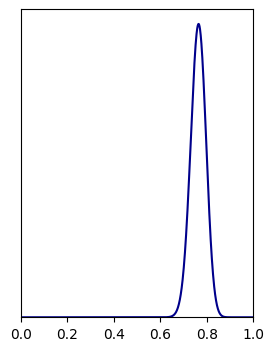

In [5]:
name = 's_'+str(s)+'_amw_'+str(round(a12,4))+'awm_'+str(round(a21,4))+'mu_'+str(mu)
print(name)
i=1
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,      # ticks along the top edge are off
    labelleft=False)
plt.gcf().set_size_inches(3, 4)
plt.savefig(name+'.png',dpi=300)

Solution for many alphas

In [6]:
vals = 1000 # number of points to evaluate function over

p = np.linspace(0.01,0.99,vals)

# Function values
N=1000
mu=0.01
s=-0.05


a12_list = [round(random.uniform(-0.3, 0.3),7) for i in range(100000)]
a21_list = [round(random.uniform(-0.3, 0.3),7) for i in range(100000)]

fp_sol = []
fp_mode=[]
fp_pot=[]

for a12,a21 in zip(a12_list, a21_list):

    #a12 = 0.1
    j=a12
    #a21 = -0.091091
    k=a21# =
    #print(p,N, mu, a12,a21,s)
    q = potential(p,N, mu, a12,a21,s)
    #print(a12,a21)
    mean_pot = np.mean(q)
    #print(q - mean_pot)
    c = np.exp(-(q)) #-mean_pot
    fp_pot.append(-q)
    fp_sol.append(c)
    fp_mode.append(p[c==max(c)][0])



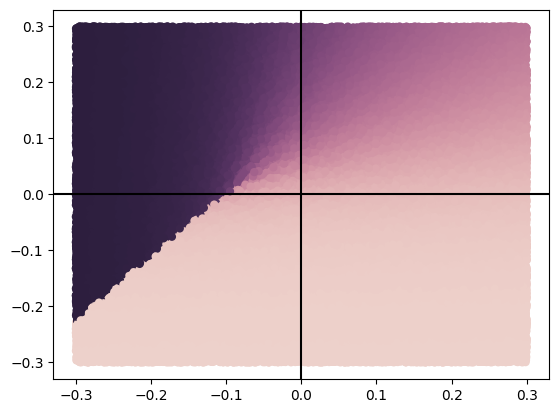

In [7]:
g =sns.scatterplot(x=a12_list, y=a21_list, hue = fp_mode,legend=False, edgecolor = "none")

# save the plot as PNG file
plt.axhline(0,c='black')
plt.axvline(0,c='black')
plt.savefig('theoreticalMODE.png', dpi=300)


s_-0.05_amw_-0.2775awm_-0.2149mu_0.01


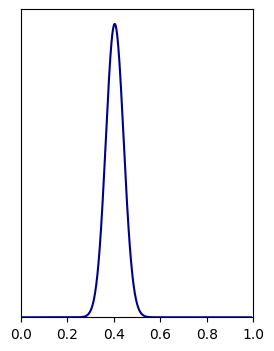

In [8]:
name = 's_'+str(s)+'_amw_'+str(round(a12,4))+'awm_'+str(round(a21,4))+'mu_'+str(mu)
print(name)
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,      # ticks along the top edge are off
    labelleft=False)
plt.gcf().set_size_inches(3, 4)
plt.savefig(name+'.png',dpi=200)

s-0.05a12_0.1181a21_0.1502


(0.0, 0.10734860917545361)

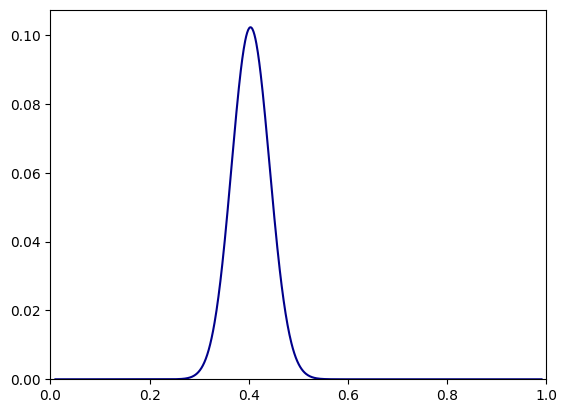

In [9]:
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]*N*mu/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

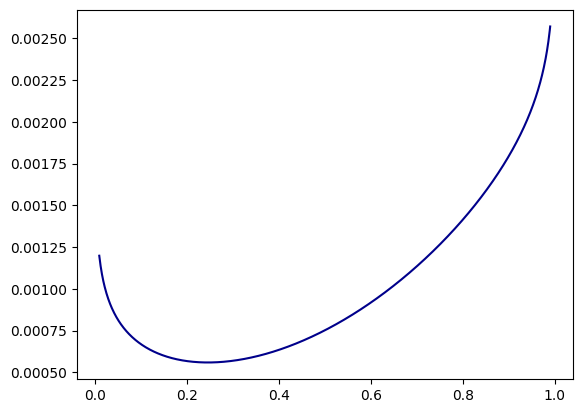

In [10]:
plt.plot(p, fp_pot[0]/sum(fp_pot[0]), color = 'darkblue')

In [ ]:
i = 7

print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 17
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 7
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 4
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 1
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 6
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 0
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
graph =sns.scatterplot(x =a12_list, y=a21_list, hue=fp_mean, linewidth=0)
graph.axhline(0, c="black")
graph.axvline(0,  c="black")
graph.axhline(s, c="black", linestyle='--')
graph.axvline(-s,  c="black", linestyle='--')
graph.legend('')

print(s, N, mu)



In [ ]:
if (a12>-2 and a21>-2):
    plt.figure()
    plt.plot(p,np.log(c))
    plt.text(np.min(p), np.log(np.min(c)), (round(a12,2),round(a21,2)))
    plt.show()
    plt.figure()
    plt.plot(p,c)
    plt.text(np.min(p), np.min(c), (round(a12,2),round(a21,2)))
    plt.show()

In [ ]:
#c = np.exp(-potential(b,N, mu, a12,a21,s))


In [ ]:
potential(x,N,mu,a12,a21,s)

Import fitting code from Sydney's Repository

In [11]:
!git clone https://github.com/sydleither/spatial-fokker-planck.git


Cloning into 'spatial-fokker-planck'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 81 (delta 43), reused 54 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 29.83 KiB | 509.00 KiB/s, done.
Resolving deltas: 100% (43/43), done.


In [19]:
!rm -rf MaskMimicMaintain/
!git clone https://github.com/rbarkerclarke/MaskMimicMaintain/

Cloning into 'MaskMimicMaintain'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 112 (delta 52), reused 46 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (112/112), 6.14 MiB | 11.97 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [20]:

import sys
sys.path.append('/content/spatial-fokker-planck/')
sys.path.append('/content/MaskMimicMaintain/')

from importlib import reload  # Python 3.4+

import importlib
import WFutils
importlib.reload(WFutils)
from WFutils import *

In [ ]:
# Check Sydney Script
#!python  /content/spatial-fokker-planck/mcmc_fit_to_self.py 100 0.01 0.01 0.01 0.01

In [ ]:
#!python /content/spatial-fokker-planck/mcmc_fit_to_data.py

Please provide N, mu, and the data path.


Generate simulation to plot

In [21]:
# Parallel CPU Code

from joblib import Parallel, delayed

# Simulation runner for one rep
def run_rep(s, awm, amw, mu, generations):
    pop = {'0': 500, '1': 500}
    a = simulate(s, awm, amw, pop, mu, generations)
    return [ii['1'] for ii in a[9900:generations]], a[9900:generations]

# Main loop
for jj, kk in zip(a12_list, a21_list):
    print(f"Running sims for a12={jj}, a21={kk}")

    results = Parallel(n_jobs=-1)(delayed(run_rep)(s, kk, jj, mu, generations) for _ in range(reps))

    history1 = [r[0] for r in results]
    history = [r[1] for r in results]

    histories1.append(flatten(history1))
    histories.append(history)


Running sims for a12=0.17, a21=0.11


KeyboardInterrupt: 

0.23


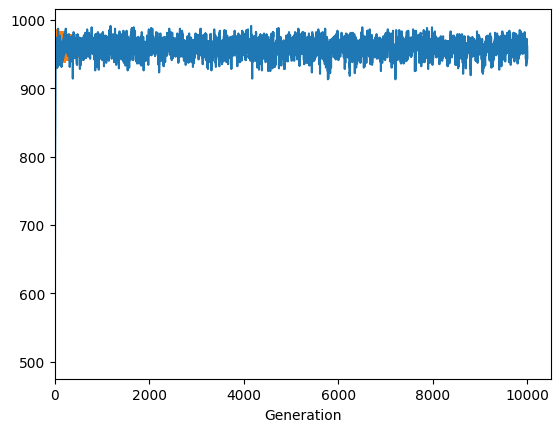

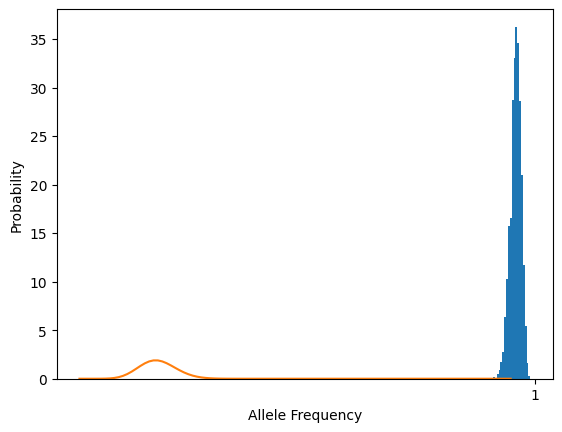

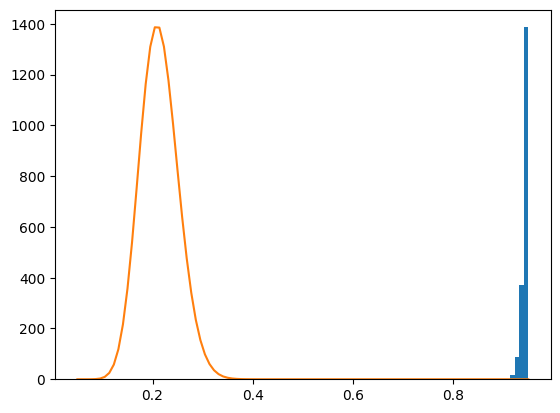

In [118]:
# Original function code

#outcome = np.array([simulate(s,x,y) for x,y in merged_list ])
outcomes = []
histories = []
histories1 = []
s=sm=0.1     # Intrinsic selection difference
#sm=0.11    # Selection to mimic
mutation_rate = mu = 0.01
generations = gens = 10000
reps = 5

'''
If generating for a range of values
'''
#a12_list = [round(random.uniform(-0.1, 0.1),3) for i in range(1)]
#a21_list = [round(random.uniform(-0.1, 0.1),3) for i in range(1)]

'''
If using fixed values
'''

a12_list=[0.23]
a21_list=[-0.11]


for jj,kk in zip(a12_list, a21_list):
    outcome = []
    history = []
    history1=[]
    print(jj)
    for i in range(1,reps+1):
        if i%100==0:
            print(f"Running simulation {i} of {reps}")
        pop = {'0':500,'1':500}
        amw = jj
        awm = kk #mimic_0(amw, s=sm)
        a = simulate(s,awm,amw,pop,mu, generations)
        history1.append([ii['1'] for ii in a[950:gens]])
        history.append(a[950:gens])
        #print(s, j ,k )
    outcomes.append(outcome)
    histories1.append(flatten(history1))
    histories.append(history)


Plot histogram of simulation outcomes:

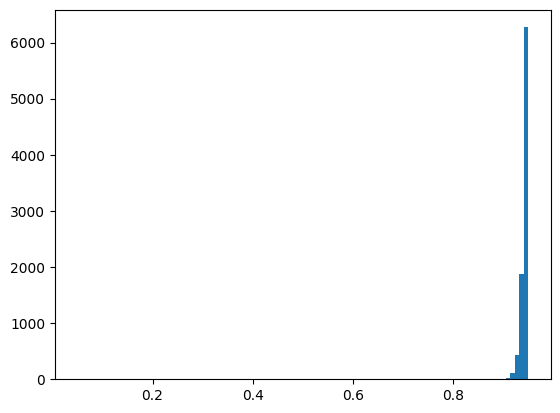

In [112]:
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

n= sum(pop.values())

WTfreqs=[i['1']/n for i in flatten(flatten(histories))]
WTfreqs_sample = random.sample(WTfreqs, 10000)


counts, bins, patches = plt.hist(WTfreqs, bins=np.linspace(0.05, 0.95, 100+1))
counts = counts/max(counts)


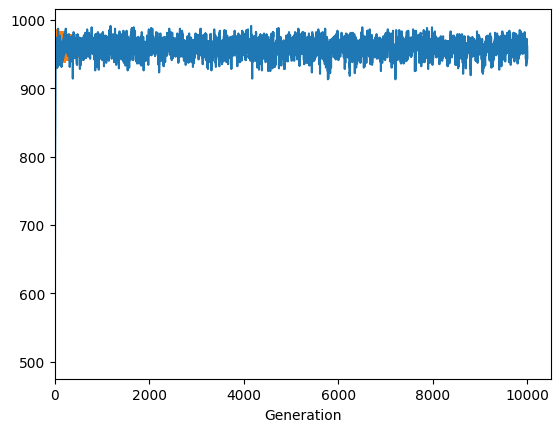

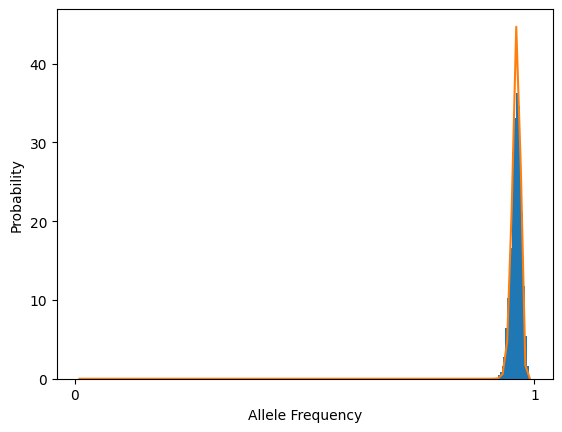

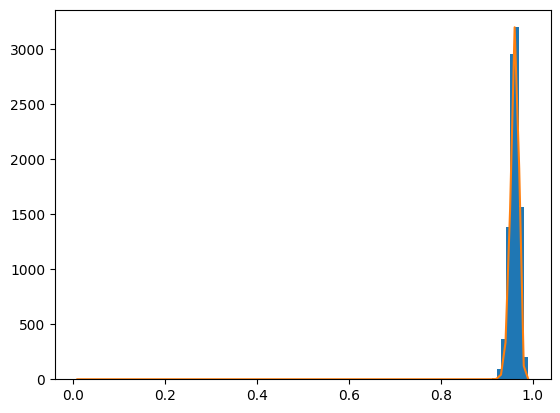

In [124]:
import mcmc_utils
import fokker_planck
from importlib import reload
reload(fokker_planck)
reload(mcmc_utils)

from fokker_planck import FokkerPlanck, param_names
from mcmc_utils import (mcmc, plot_walker_curves, lnprob,
                        plot_walker_gamespace, plot_walker_params)

n= sum(pop.values())
plot([ii['1'] for ii in a])
plt.xlabel("Generation")
plt.hist([ii['1'] for ii in a[200:-1]], orientation='horizontal',bins=20)
sims = [ii['1']/n for ii in a[200:-1]]
plt.figure()

plt.hist(sims, orientation='vertical',bins=20, density=True)
plt.xticks(range(0, 1+1))
plt.xlabel("Allele Frequency")

x = np.linspace(0.01, 0.99, 100)
y = FokkerPlanck(n,mu).fokker_planck_density(x, amw,awm,sm)

plot(x,y)
plt.xlabel("Allele Frequency")
plt.ylabel("Probability")


plt.figure()
counts, bins, patches = plt.hist(sims, bins=np.linspace(0.01, 0.99, 100+1))
max_counts = max(counts)
#counts = counts/max_counts
x = np.linspace(0.01, 0.99, 100)
y = max_counts*FokkerPlanck(n,mu).fokker_planck_normalized(x, amw,awm,sm)

plot(x,y)


counts = counts/max_counts

In [ ]:
import sys
import numpy as np

import mcmc_utils
import fokker_planck
from importlib import reload
reload(fokker_planck)
reload(mcmc_utils)

from fokker_planck import FokkerPlanck, param_names
from mcmc_utils import (mcmc, plot_walker_curves, lnprob,
                        plot_walker_gamespace, plot_walker_params)

nit=10000
params = (n, mu, awm, amw, sm)
params = [float(x) for x in params]
true_params = [float(x) for x in [n, mu, amw, awm, sm]][2:]
print(params)

print(f"Fitting mcmc results for original simulations with N={n}, mu={mu}, awm={awm}, amw={amw}, s={sm}")

n=sum(pop.values())
fp = FokkerPlanck(n, mu).fokker_planck_normalized
xdata = np.linspace(0.01, 0.99, 100)

ydata= counts/max(counts)
param_names

walker_ends = mcmc(fp, xdata, ydata,niter=nit)


[1000.0, 0.01, -0.11, 0.23, 0.1]
Fitting mcmc results for original simulations with N=1000, mu=0.01, awm=-0.11, amw=0.23, s=0.1


/content/spatial-fokker-planck/fokker_planck.py:38: RuntimeWarning: overflow encountered in exp
  rho = 2*n*np.exp(-phi)
/content/spatial-fokker-planck/fokker_planck.py:38: RuntimeWarning: overflow encountered in multiply
  rho = 2*n*np.exp(-phi)
/content/spatial-fokker-planck/fokker_planck.py:58: RuntimeWarning: invalid value encountered in divide
  rho = rho / max(rho)
/usr/local/lib/python3.11/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


In [122]:
import os

save_loc="/content/output_norm/"
os.makedirs(save_loc, exist_ok=True)


import mcmc_utils
import fokker_planck
from importlib import reload
reload(fokker_planck)
reload(mcmc_utils)

from fokker_planck import FokkerPlanck, param_names
from mcmc_utils import (mcmc, plot_walker_curves,
                        plot_walker_gamespace, plot_walker_params)


true_params = [float(x) for x in [n, mu, awm, amw, sm]][2:]
params = [n,mu,awm,amw,sm]

print(f"Plotting mcmc results for original simulations with N={n}, mu={mu}, awm={awm}, amw={amw}, s={sm}")

file_name = "_".join([f"{param_names[i]}={params[i]}" for i in range(len(params))])
plot_walker_curves(save_loc, file_name, fp, walker_ends, xdata, ydata)
plot_walker_gamespace(save_loc, file_name, walker_ends, true_params)
plot_walker_params(save_loc, file_name, walker_ends)

Plotting mcmc results for original simulations with N=1000, mu=0.01, awm=-0.11, amw=0.23, s=0.1


In [123]:
import numpy as np
print(params)
np.median(walker_ends, axis=0)

[np.int64(1000), 0.01, -0.11, 0.23, 0.1]


array([ 0.98961612, -0.99998225, -0.99046001])

In [ ]:
params

[np.int64(1000), 0.01, 0.11, 0.17, 0.1]